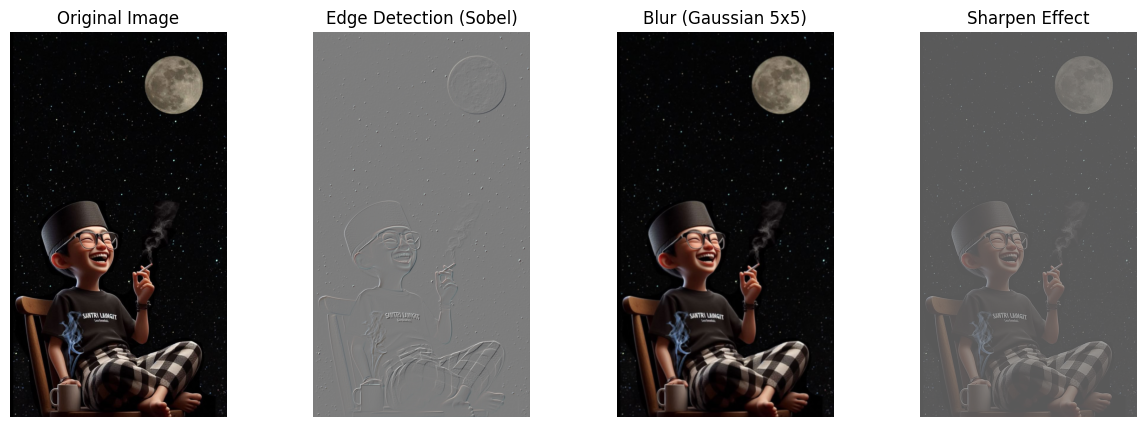

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Fungsi untuk melakukan konvolusi dengan normalisasi hasil pada tiap kanal warna
def convolve_color(image, kernel):
    h, w, c = image.shape  # Ambil dimensi gambar
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    # Padding gambar
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='constant', constant_values=0)

    # Output array
    new_image = np.zeros((h, w, c))

    # Konvolusi manual untuk tiap kanal warna (R, G, B)
    for channel in range(c):
        for i in range(h):
            for j in range(w):
                new_image[i, j, channel] = np.sum(kernel * padded_image[i:i+kh, j:j+kw, channel])

    # Normalisasi hasil agar lebih kontras
    new_image = np.clip((new_image - new_image.min()) / (new_image.max() - new_image.min()), 0, 1)

    return new_image

# Baca gambar
image_path = "kopimalam.jpeg"
img = Image.open(image_path)
img = np.array(img) / 255.0  # Normalisasi

# Gunakan filter Sobel untuk edge detection
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y = np.array([
    [-1, -2, -1],
    [0,   0,  0],
    [1,   2,  1]
])

# Terapkan filter Sobel untuk mendeteksi tepi pada tiap kanal warna
edge_x = convolve_color(img, sobel_x)
edge_y = convolve_color(img, sobel_y)

# Gabungkan hasil edge detection dari sumbu X dan Y
edge_img = np.sqrt(edge_x**2 + edge_y**2)
edge_img = np.clip((edge_img - edge_img.min()) / (edge_img.max() - edge_img.min()), 0, 1)

# Gaussian Blur 5x5 untuk hasil blur lebih jelas
blur_kernel = np.array([
    [1, 4,  7,  4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4,  7,  4, 1]
]) / 273  # Normalisasi agar jumlah bobot tetap 1

sharpen_kernel = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

# Lakukan konvolusi dengan berbagai filter pada tiap kanal warna
blur_img = convolve_color(img, blur_kernel)
sharp_img = convolve_color(img, sharpen_kernel)

# Tampilkan hasil
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(edge_img)
axes[1].set_title("Edge Detection (Sobel)")
axes[1].axis("off")

axes[2].imshow(blur_img)
axes[2].set_title("Blur (Gaussian 5x5)")
axes[2].axis("off")

axes[3].imshow(sharp_img)
axes[3].set_title("Sharpen Effect")
axes[3].axis("off")

plt.show()


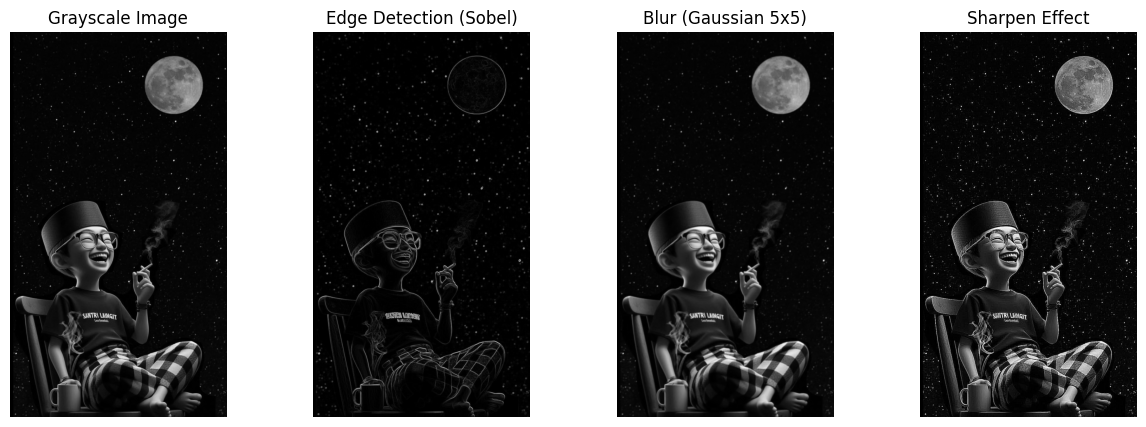

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import convolve

# Baca gambar dan konversi ke grayscale
image_path = "kopimalam.jpeg"
img = cv2.imread(image_path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Edge Detection menggunakan Sobel
grad_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
edge_img = cv2.magnitude(grad_x, grad_y)
edge_img = (edge_img - edge_img.min()) / (edge_img.max() - edge_img.min())  # Normalisasi

# Gaussian Blur dengan OpenCV
blur_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

# Sharpening filter
sharpen_kernel = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
])
sharp_img = cv2.filter2D(gray_img, -1, sharpen_kernel)

# Tampilkan hasil
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(gray_img, cmap='gray')
axes[0].set_title("Grayscale Image")
axes[0].axis("off")

axes[1].imshow(edge_img, cmap='gray')
axes[1].set_title("Edge Detection (Sobel)")
axes[1].axis("off")

axes[2].imshow(blur_img, cmap='gray')
axes[2].set_title("Blur (Gaussian 5x5)")
axes[2].axis("off")

axes[3].imshow(sharp_img, cmap='gray')
axes[3].set_title("Sharpen Effect")
axes[3].axis("off")

plt.show()